## Importing library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data 

## Load the Dataset

In [2]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835594
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221169
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194138
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616684
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139938


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


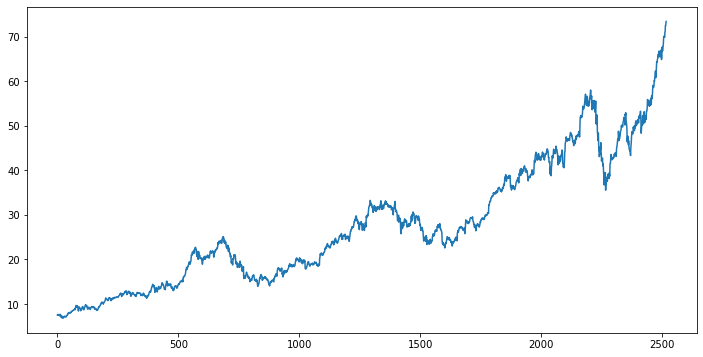

In [6]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


## Moving average of 100 days

In [8]:
ma100 = df.Close.rolling(100).mean()     # ma = moving average 
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

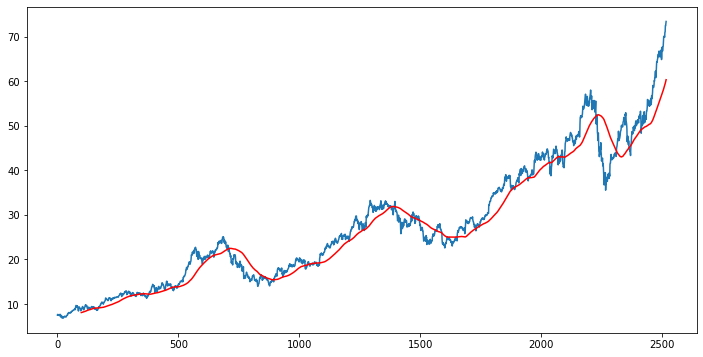

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

## Moving Average of 200 days

In [10]:
ma200 = df.Close.rolling(200).mean()     # ma = moving average 
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

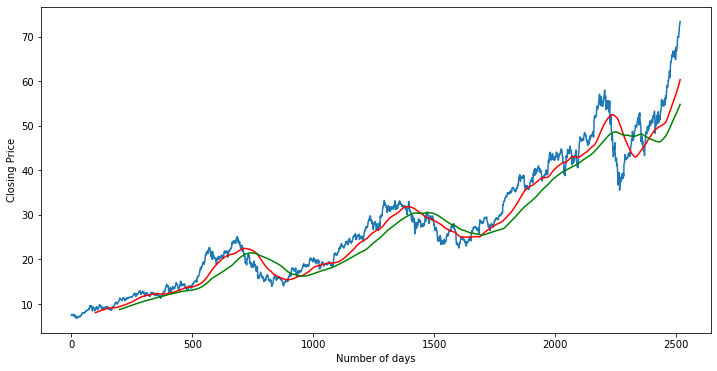

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.xlabel('Number of days')
plt.ylabel('Closing Price')
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(2517, 5)

## Splitting the data into Training and Testing

In [13]:
train_data = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test_data = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(train_data.shape)
print(test_data.shape)

(1761, 1)
(756, 1)


In [14]:
train_data.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
test_data.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


## Importing more libraries

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [17]:
train_data_array = scaler.fit_transform(train_data)
train_data_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [18]:
train_data_array.shape

(1761, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, train_data_array.shape[0]):
    x_train.append(train_data_array[i-100: i])
    y_train.append(train_data_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
print(x_train.shape)
print(y_train.shape)

(1661, 100, 1)
(1661,)


## ML models

In [84]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [85]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))

model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
model.add(Dropout(0.5))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 100, 60)           26640     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100, 60)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 100, 80)           45120     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100, 80)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 100)         

In [87]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
52/52 [==============================] - 12s 151ms/step - loss: 0.0698
Epoch 2/50
52/52 [==============================] - 8s 156ms/step - loss: 0.0170
Epoch 3/50
52/52 [==============================] - 10s 200ms/step - loss: 0.0114
Epoch 4/50
52/52 [==============================] - 11s 209ms/step - loss: 0.0116
Epoch 5/50
52/52 [==============================] - 10s 200ms/step - loss: 0.0104
Epoch 6/50
52/52 [==============================] - 10s 199ms/step - loss: 0.0103
Epoch 7/50
52/52 [==============================] - 10s 201ms/step - loss: 0.0092
Epoch 8/50
52/52 [==============================] - 10s 199ms/step - loss: 0.0086
Epoch 9/50
52/52 [==============================] - 10s 201ms/step - loss: 0.0085
Epoch 10/50
52/52 [==============================] - 11s 217ms/step - loss: 0.0084
Epoch 11/50
52/52 [==============================] - 11s 209ms/step - loss: 0.0080
Epoch 12/50
52/52 [==============================] - 10s 198ms/step - loss: 0.0078
Epoch 13/50
52

In [88]:
model.save('keras_model.h5')

In [89]:
# for predicting the testing data we need previous 100 days values
# so we append the testing data with the previous 100 days data from training set

past_100_days = train_data.tail(100)

In [90]:
final_df = past_100_days.append(test_data, ignore_index = True)

In [91]:
final_df.head(10)

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000
5,27.370001
6,27.344999
7,27.305000
8,27.270000
9,27.340000


In [92]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [93]:
# previously it was 756, but now it is 856 because we append the 100 days data
# of the training set
input_data.shape  

(856, 1)

In [94]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [95]:
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [96]:
# predictions

y_pred = model.predict(x_test)

In [97]:
y_pred.shape

(756, 1)

In [98]:
y_test.shape

(756,)

In [99]:
z = scaler.scale_
z

array([0.02099517])

In [100]:
scale_factor = 1/z
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

In [101]:
y_test

array([ 3.40000153,  3.17250061,  3.25500107,  3.22249985,  3.37000084,
        3.6950016 ,  3.96500015,  3.99500084,  4.15500069,  4.03000069,
        3.97750092,  4.21750069,  4.21500015,  4.16250038,  4.21750069,
        4.23750114,  4.21000099,  4.6875    ,  4.7025013 ,  4.70499992,
        4.625     ,  4.55500031,  6.40500069,  6.35000038,  6.48750114,
        6.78999901,  7.10000038,  7.22749901,  7.32250023,  7.24749947,
        7.53999901,  7.97250175,  8.09499931,  8.05500221,  8.14750099,
        8.39249992,  8.49500084,  8.35000038,  8.3825016 ,  8.44999886,
        8.46500206,  9.16499901,  8.95750237,  9.16250038,  9.05249977,
        9.09750175,  8.96750069,  8.88749886,  9.00250053,  9.01749992,
        8.96500206,  9.33250237,  9.3900013 ,  9.21500206,  9.58250237,
        9.17749977,  9.57250023,  9.44750023,  9.37750053,  9.43750191,
       10.16750145, 10.24749947, 10.19999886, 10.1325016 , 10.14249992,
       10.41000175, 10.22250175, 10.1325016 , 10.05249977, 10.01

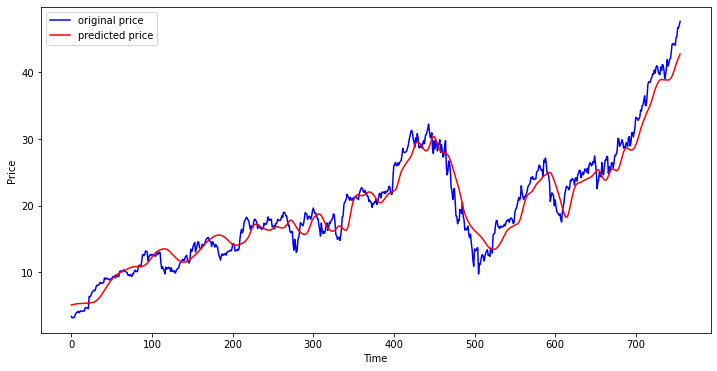

In [102]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'original price')
plt.plot(y_pred, 'r', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()